MTH 4600: Data Analysis and Simulation

Homework 1

Group Members: Jaime Abbariao, Bell Chen, Jonnathan Romero

(Python Implementation)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Question 1

Lookback Option: 
[9.1540476706931457, 8.8636194316054109, 8.3593917258293651, 8.3790370711264845, 7.3846603873892018, 7.6107037958106103, 7.2813469564342324, 7.1506859469405137, 6.2358625787018243, 6.2512775433146128, 5.2607267132384932]


Asian Option: 
[0.43953191119402235, 0.59582320237586528, 0.7152728830586903, 1.0023928199305498, 0.92350722640656202, 1.3208675761472437, 1.4956469954379745, 1.5901191791385483, 1.3922274303169362, 1.8289739987082336, 1.837317680639593]


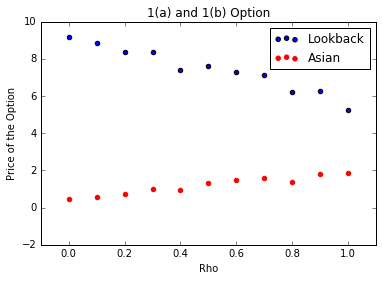

In [15]:
s0 = 100 # initial price
k = 110 # strike price
T = 0.25 # time to expiration (3 months)
r = 0.03 # interest rate
M = 1000 # number of simulations
I = 1000 # number of samples
dt = T/I # increments of steps
discount_factor = np.exp(-r * T) # discount factor for option pricing

lookback_price = {} # dictionary for prices by the rho value
asian_price = {} # dictionary for prices by the rho value

# generate a list of rho values from 0 to 1 by steps of 0.1
rhos = [x for x in np.arange(0, 1, 0.1)] + [0.99999999]

'''
To ease the calculation of the stock pricing,
we partition parts of the Geometric Brownian Motion calculation here
'''
xdrift = (r - 0.5 * (0.2 * 0.2)) * dt  
xrand = np.sqrt(dt) * 0.2

ydrift = (r - 0.5 * (0.25 * 0.25)) * dt
yrand = np.sqrt(dt) * 0.25

zdrift = (r - 0.5 * (0.3 * 0.3)) * dt
zrand = np.sqrt(dt) * 0.3

'''
Modular version of the path simulation
to make code more readable
This function returns an array of the values 
of the price simulation.
'''
def simulatePath(drift, rand, norm):
    return s0 * np.exp(drift + rand*norm)

'''
This function returns the payoff of the lookback option
in 1(a) divided by the number of simulations.
'''
def lookbackPayoff(s0, s1, s2):
    lp = max(s0.max(), s1.max(), s2.max()) - 110
    return lp/M if lp > 0 else 0

'''
This function returns the payoff of the asian option
in 1(b) divided by the number of simulations
'''
def asianPayoff(s0, s1, s2):
    ap = np.average([s0[len(s0)-1], s1[len(s1)-1], s2[len(s2)-1]])-110
    return ap/M if ap > 0 else 0



for rho in rhos: # we loop through the values of rho
    
    '''
    This calculates the Cholesky Decomposed matrix of the covariance matrix
    '''
    cho_mat = np.linalg.cholesky([[1, rho, rho], [rho, 1, rho], [rho, rho, 1]])

    lookback_payoff_sum = asian_payoff_sum = 0 # initializing the running sum


    for i in range(0, M): # loop through simulations

        uncorr_normal = np.random.standard_normal((3, I)) # generate 3 random Gaussian vectors
        chol_normal = np.dot(cho_mat, uncorr_normal) # dot product produces 3 correlated Gaussian vectors

        '''
        To speed up the simulation of the path, we take the cumulative sum
        of the correlated Gaussian vectors.
        '''
        xnorm = np.cumsum(chol_normal[0])
        ynorm = np.cumsum(chol_normal[1])
        znorm = np.cumsum(chol_normal[2])
    

        '''
        We simulate the 3 paths here.
        '''
        sx = simulatePath(xdrift, xrand, xnorm)
        sy = simulatePath(ydrift, yrand, ynorm)
        sz = simulatePath(zdrift, zrand, znorm)
        

        lookback_payoff_sum += lookbackPayoff(sx, sy, sz) # collect the sum of the payoffs 
        
        asian_payoff_sum += asianPayoff(sx, sy, sz) # collect the sum of the payoffs

    '''
    The price of the option can be calculated discounting the average payoff
    After that, we enter the rho and price into the dictionary as a key-value pair
    '''
    lookback_price[rho] = lookback_payoff_sum * discount_factor
    asian_price[rho] = asian_payoff_sum *discount_factor


print('Lookback Option: ')
print([lookback_price[x] for x in rhos])
print('\n')
print('Asian Option: ')
print([asian_price[x] for  x in rhos])

plt.scatter(list(lookback_price.keys()), list(lookback_price.values()), label='Lookback')
plt.title('1(a) and 1(b) Option')
plt.xlabel('Rho')
plt.ylabel('Price of the Option')
plt.xlim([-0.1, 1.1])
plt.scatter(list(asian_price.keys()), list(asian_price.values()), color='red', label='Asian')
plt.legend()
plt.show()

# Question 2

('Weights of Minimum Variance Portfolio', array([-0.25473115,  0.13868405,  0.02453389, -0.01243963, -0.02866298,
       -0.05574317,  0.03783649, -0.06750259, -0.03510068,  0.40013854,
       -0.05011906,  0.08603739,  0.07853835,  0.06120593, -0.00288849,
        0.02090359, -0.14128979,  0.20494511,  0.08289061,  0.01419278,
        0.19411964, -0.00834335,  0.02964405, -0.15571107,  0.12811613,
        0.06602595,  0.13861986,  0.08512257,  0.20129847, -0.18032147]))


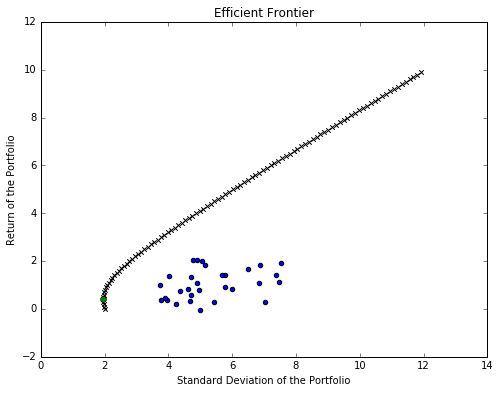

('Weights of Efficient Portfolio with Expected Return of 0.3% ', array([-0.27542173,  0.14813043,  0.02696857, -0.01257222, -0.02744458,
       -0.06340129,  0.04024693, -0.05723856, -0.0337815 ,  0.43128138,
       -0.06170297,  0.08755028,  0.07158491,  0.06565729, -0.00234224,
       -0.00377081, -0.14809254,  0.22125206,  0.07715515,  0.01219362,
        0.1913879 ,  0.00459469,  0.03891452, -0.15699969,  0.1197678 ,
        0.07443459,  0.1400928 ,  0.074789  ,  0.20478847, -0.18802227]))


In [23]:
DJIA = pd.read_csv('DJIA-Data.csv') # read in the file into a DataFrame

noa = len(DJIA.columns) # number of assets

mu = DJIA.mean() # sample mean vector for each asset

cov_mat = DJIA.cov() # covariance matrix for DataFrame

std_dev = DJIA.std() # standard deviation for each asset

'''
This function computes the sample mean of the portfolio
'''
def sampleMean(weights, mu):
    return np.sum(mu * weights)

'''
This function computes the volatility of the portfolio
'''
def sampleVol(weights, cov):
    return np.sqrt(np.dot(np.dot(cov, weights), weights.T))

'''
This function computes the means and volatlities of the efficient portfolios
'''
def minimumVarianceLine(cov, mu):
    u = np.array([1] * len(mu)) # initialize a unit vector

    '''
    The following is an implementation to find components for
    the weights of the minimum variance portfolio
    found in our textbook, Statistical Models and Methods 
    for Financial Markets
    '''
    A = np.dot(np.dot(mu.T, np.linalg.inv(cov_mat)), u)
    B = np.dot(np.dot(mu.T, np.linalg.inv(cov_mat)), mu)
    C = np.dot(np.dot(u.T, np.linalg.inv(cov_mat)), u)
    D = B*C - A*A
    p1 = np.dot(B * np.linalg.inv(cov_mat), u)
    p2 = np.dot(A * np.linalg.inv(cov_mat), mu)
    p3 = np.dot(C*np.linalg.inv(cov_mat), mu) - np.dot(A*np.linalg.inv(cov_mat),u)
    

    eff_mu = [] # initalize lists to store the efficient means
    eff_vol = [] # initialize lists to store the efficient volalities
    
    '''
    Next, we want to loop through possible target values for the mean
    from which we can gather the efficient portfolios.
    '''
    for x in np.arange(0.0, 10, 0.1):
        eff_mu.append(sampleMean(((p1 - p2 + x *(p3)) / D), mu))
        eff_vol.append(sampleVol(((p1 - p2 + x *(p3)) / D), cov_mat))
    
    eff_mu = np.array(eff_mu)
    eff_vol = np.array(eff_vol)

    '''
    Calculates the weights of the minimum variance portfolio 
    where (A/C) is chosen to minimize the variance
    '''
    mvp_weights = ((p1 - p2 + (A/C) *(p3)) / D)
    
    mvp_mu = np.dot(mu, mvp_weights.T) # calculates mean of MVP
    mvp_vol = np.sqrt((B - 2 * mvp_mu*A + (mvp_mu**2)*C) /D) # calculates volatility of MVP

    specific_weights = ((p1 - p2 + 0.3 *(p3)) / D)

    return eff_mu, eff_vol, mvp_mu, mvp_vol, mvp_weights, specific_weights

eff_mu, eff_vol, mvp_mu, mvp_vol, mvp_weights, specific_weights = minimumVarianceLine(cov_mat, mu)

'''
Question 2(a)
'''
print('Weights of Minimum Variance Portfolio', mvp_weights) # weights of the MVP
'''
This function plots the efficient frontier
along with the 30 points and the minimum variance portfolio
'''
def plotEfficientFrontier(eff_vol, eff_mu, mvp_vol, mvp_mu, s_vol, s_mu):
    plt.figure(figsize=(8,6))
    plt.title('Efficient Frontier')
    plt.xlabel('Standard Deviation of the Portfolio')
    plt.ylabel('Return of the Portfolio')
    plt.scatter(eff_vol, eff_mu, color='black', marker='x')
    plt.plot(mvp_vol, mvp_mu, color='green', marker='o')
    plt.scatter(s_vol, s_mu)
    plt.show()

plotEfficientFrontier(eff_vol, eff_mu, mvp_vol, mvp_mu, std_dev, mu)

'''
Question 2(b)
'''
def marketWeights(cov, mu):
    u = np.array([1] * len(mu))

    return np.dot(mu - 0.15*u, np.linalg.inv(cov))/(np.dot(np.dot(mu - 0.15*u, np.linalg.inv(cov)), u.T))


mark_weights = marketWeights(cov_mat, mu)

'''
Question 2(c)
'''
print('Weights of Efficient Portfolio with Expected Return of 0.3% ', specific_weights) # weights for expected return of 0.3%